# CDNOW用户购买行为分析

## 本项目分析内容：
   #### 0.数据准备
   #### 1.用户消费趋势分析（按月）
   #### 2.用户的个体消费分析
   #### 3.消费行为分析
   #### 4.复购率及回购率分析

## 数据准备

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [2]:
columns = ['user_id','paidtime','order_quantity','price']
cd = pd.read_table(r'C:\Users\Administrator\Desktop\CDNOW_master.txt',sep='\s+',names=columns)

In [ ]:
cd.paidtime = pd.to_datetime(cd.paidtime,format='%Y%m%d')

In [3]:
cd.head()

,user_id,paidtime,order_quantity,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


* user_id：用户ID
* paidtime：购买日期
* order_quantity：购买量
* price：购买金额

In [169]:
cd.describe()

,user_id,order_quantity,price
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


#### 每个订单的平均购买量为2.41，中位数为2
#### 每个订单的平均购买金额为35.9 中位数为26
#### 标准差均较大，且属于正偏分布，说明有小部分用户的购买量和购买金额非常大，该部分用户为重要客户

## 用户消费趋势分析（按月）

### 分析内容包含以下几个部分：
* 每月消费总金额
* 每月消费总次数
* 每月销售产品数
* 每月消费人数

In [6]:
#确定月份
cd['month'] = cd.paidtime.astype('datetime64[M]')

In [94]:
month_grouped = cd.groupby('month')

### 每月消费总金额

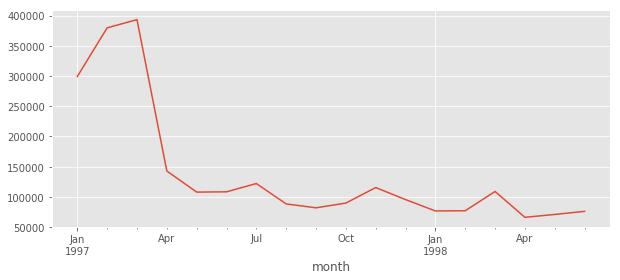

In [95]:
ax = month_grouped.sum()['price'].plot(figsize=(10,4))

#### 从图中可以看出前三个月总销售金额较高，在35w左右，之后趋于平稳，在10w左右

### 每月消费总次数

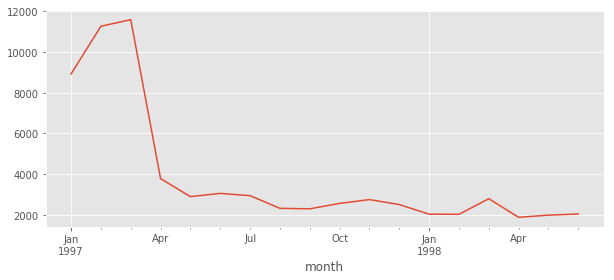

In [58]:
month_grouped.count()['user_id'].plot(figsize=(10,4))

#### 从图中可以看出前三个月消费次数较高，月均消费次数在1w左右，之后趋于平稳，月均消费次数在2500左右

### 每月销售产品数

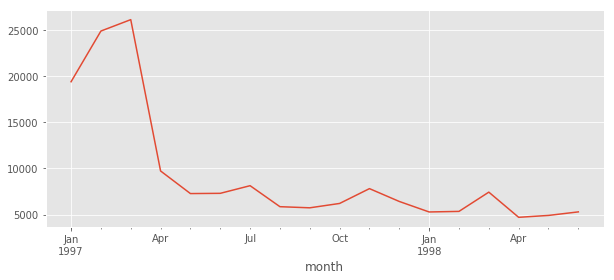

In [60]:
month_grouped.sum()['order_quantity'].plot(figsize=(10,4))

#### 从图中可以看出前三个月销量较高，之后趋于平稳,稳定在5000左右

### 每月消费人数

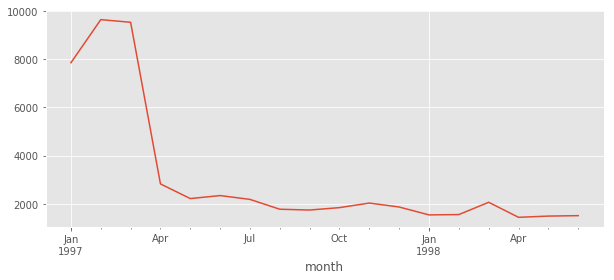

In [91]:
month_grouped.user_id.apply(lambda x: len(x.drop_duplicates())).plot(figsize=(10,4))

#### 从图中可以看出前三个月消费顾客数量激增，之后趋于平稳，月均消费人数在2000左右

In [93]:
#数据透视表
table = cd.pivot_table(index='month',values=['user_id','order_quantity','price'],aggfunc={'user_id':'count','order_quantity':'sum','price':'sum'})
table.rename(columns={'order_quantity':'quantity','price':'amount','user_id':'frequence'})

,quantity,amount,frequence
month,,,
1997-01-01,19416,299060.17,8928
1997-02-01,24921,379590.03,11272
1997-03-01,26159,393155.27,11598
1997-04-01,9729,142824.49,3781
1997-05-01,7275,107933.30,2895
1997-06-01,7301,108395.87,3054
1997-07-01,8131,122078.88,2942
1997-08-01,5851,88367.69,2320
1997-09-01,5729,81948.80,2296


#### 综上，结果反映了消费人群集中在前三个月，从1997年4月开始，销售额、消费次数、消费量和消费人数均下降较大且逐渐趋于平稳，这也反映了用户的粘性不足

## 用户个体消费分析

### 用户个体消费分析包含以下几个方面：
* 顾客消费金额、次数描述统计
* 消费金额分布图
* 消费金额、消费次数相关性
* 消费次数分布图
* 用户累积消费占比（百分之多少的用户占了百分之多少的消费额）

In [111]:
user_grouped = cd.groupby('user_id')

### 顾客消费金额、次数描述统计

In [8]:
user_grouped.sum()['price'].describe()

count    23570.000000
mean       106.080426
std        240.925195
min          0.000000
25%         19.970000
50%         43.395000
75%        106.475000
max      13990.930000
Name: price, dtype: float64

#### 顾客平均消费金额为106元，最大消费金额为13991元，消费金额中位数为43元，属于正偏分布，说明有少量的顾客的消费额极高

In [15]:
user_grouped.count()['price'].describe()

count    23570.000000
mean         2.955409
std          4.736558
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: price, dtype: float64

#### 顾客平均消费次数为2.96次，最大消费次数为217次，大部分人的消费次数为1次

### 消费金额分布图

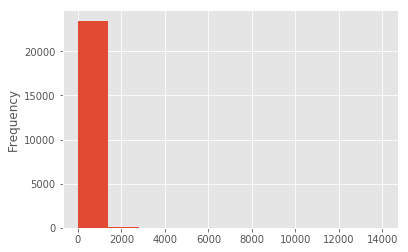

In [17]:
user_grouped.sum()['price'].plot.hist()

#### 说明大部分顾客的消费金额较低，在2000元以下

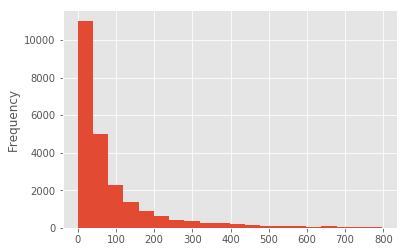

In [176]:
user_grouped.sum().query('price<800')['price'].plot.hist(bins=20)

#### 滤出较大异常值后可以发现，大部分用户的消费金额较低，在100元以下

### 消费金额、消费次数相关性

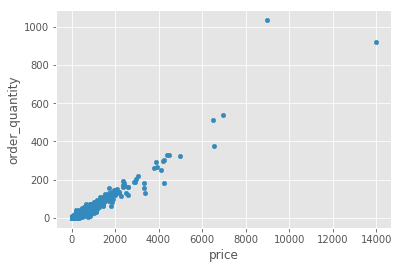

In [22]:
user_grouped.sum().plot.scatter(x='price',y='order_quantity')

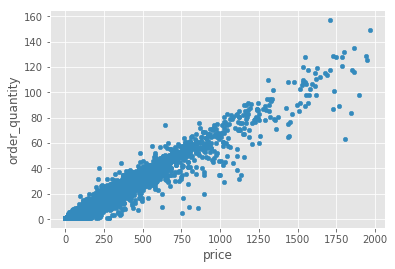

In [24]:
user_grouped.sum().query('price<2000').plot.scatter(x='price',y='order_quantity')

#### 购买量和消费金额呈显著的线性相关关系，说明CD产品单价较为稳定

### 消费次数分布图

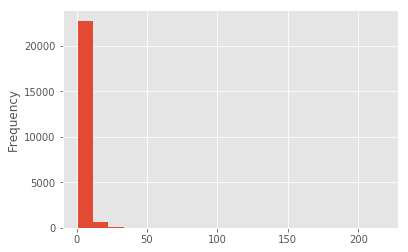

In [28]:
user_grouped.count()['price'].plot.hist(bins=20)

#### 说明大部分用户消费次数较少，大多消费一次

### 用户累积消费占比

In [44]:
pec = user_grouped.sum()['price'].sort_values().cumsum()/user_grouped.sum()['price'].sum()

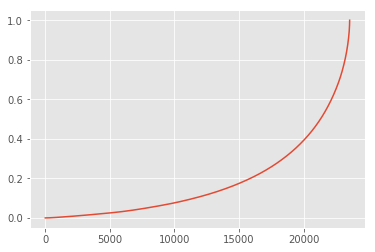

In [50]:
pec.reset_index().price.plot()

#### 从消费占比分布图中可以看出，大约25%用户的消费额贡献了总消费的60%

## 用户消费行为

### 用户消费行为分析内容包含以下方面：
* 新老客户消费比
 * 多少用户仅消费了一次？
* 顾客引流与用户流失（第一次消费和最后一次消费）
* 用户分层
 * RFM分层
 * 新、老、活跃、回流、流失分层
* 用户购买周期
* 用户生命周期

### 新老客户消费比

In [178]:
rec = user_grouped.paidtime.agg(['min','max'])

In [180]:
rate = (rec['min'] == rec['max']).value_counts()
rate

True     12054
False    11516
dtype: int64

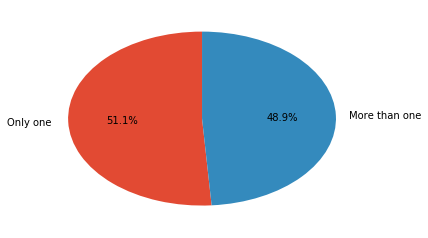

In [208]:
patches,l_text,p_text = plt.pie(rate,startangle=90,labels=['Only one ','More than one'],autopct='%2.1f%%')

#### 大约有一半用户只消费了一次

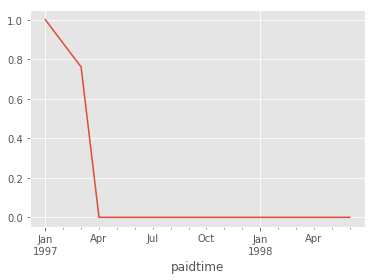

In [219]:
cd2 = cd.set_index('paidtime')
user_new = cd2.drop_duplicates('user_id')['user_id'].resample('M').count()
user_sum = cd2.resample('M')['user_id'].nunique()
(user_new/user_sum).fillna(0).plot()

#### 每月新用户占比
* 从图中可以看出前三个月新用户占比较大，之后没有新用户的加入

### 顾客引流与用户流失

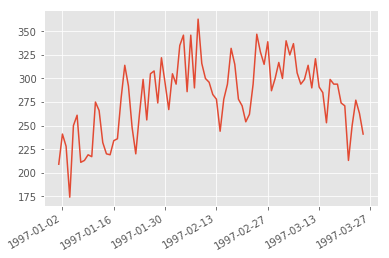

In [101]:
user_grouped.min()['paidtime'].value_counts().plot()

#### 新顾客全部集中在前三月份，1997年4月份之后几乎没有新用户
#### 新增用户在1997.2.11至1997.2.25之间有巨大波动，可根据具体情况进行分析

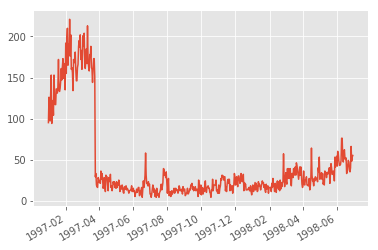

In [102]:
user_grouped.max()['paidtime'].value_counts().plot()

#### 前三个月用户流失较多（因为只消费了一次），之后用户流失逐渐增加

### 用户分层
#### ·RFM分层
* RFM模型，通过对用户在R(Recency,最近一次消费） F （Frequency,消费频率） M（消费金额）三方面的表现进行分类，然后对分组分类进行定性描述

In [12]:
rfm = cd.pivot_table(index='user_id',
                    values=['paidtime','order_quantity','price'],
                    aggfunc={'paidtime':'max','order_quantity':'sum','price':'sum'})

In [16]:
rfm['R'] = (rfm.paidtime.max()-rfm.paidtime)/np.timedelta64(1,'D')

In [20]:
rfm.rename(columns={'order_quantity':'F','price':'M'},inplace=True)

In [29]:
rfm.drop('paidtime',axis=1,inplace=True)

In [35]:
new_rfm = rfm.apply(lambda x : x-x.mean()).applymap(lambda x:'1' if x>=0 else '0')

In [226]:
def label(x):
    lable = x['R'] + x['F'] + x['M']
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'潜在客户'
    }
    return d[lable]

In [227]:
new_rfm['lable'] = new_rfm.apply(label,axis=1)

([<matplotlib.patches.Wedge at 0x18414160>,
 [Text(-0.0112893,1.09994,'一般价值客户'),
  Text(-0.0527617,1.09873,'一般保持客户'),
  Text(-1.02131,-0.408561,'一般发展客户'),
  Text(0.992723,-0.473816,'潜在客户'),
  Text(1.09457,0.109196,'重要价值客户'),
  Text(0.757394,0.797718,'重要保持客户'),
  Text(0.118966,1.09355,'重要发展客户'),
  Text(0.0353286,1.09943,'重要挽留客户')],
 [Text(-0.00615779,0.599968,'0.3%'),
  Text(-0.0287791,0.599309,'0.9%'),
  Text(-0.557079,-0.222851,'59.7%'),
  Text(0.541485,-0.258445,'14.0%'),
  Text(0.597036,0.0595613,'3.3%'),
  Text(0.413124,0.435119,'19.3%'),
  Text(0.0648906,0.596481,'1.4%'),
  Text(0.0192701,0.59969,'1.0%')])

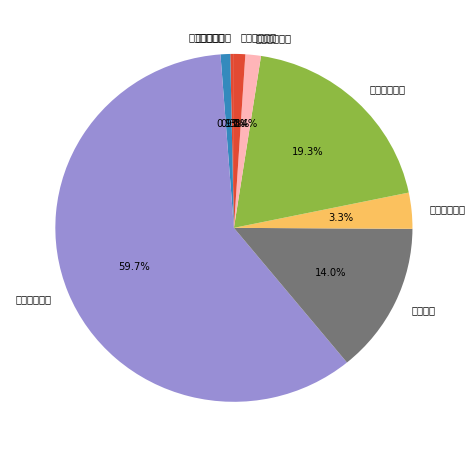

In [268]:
import pylab
label_count = new_rfm.groupby('lable').count()
pylab.rcParams['figure.figsize'] = (8,8)
plt.pie(label_count['F'],autopct='%3.1f%%',startangle=90,labels =['一般价值客户','一般保持客户','一般发展客户','潜在客户','重要价值客户','重要保持客户','重要发展客户','重要挽留客户'])

In [267]:
label_count['F']

lable
一般价值客户       77
一般保持客户      206
一般挽留客户    14074
潜在客户       3300
重要价值客户      787
重要保持客户     4554
重要发展客户      331
重要挽留客户      241
Name: F, dtype: int64

#### 可以看出一般潜在客户占比最高，重要保持客户占比在19%左右

#### ·活跃程度分层

In [100]:
rfm2 = cd.pivot_table(index='user_id',
                    columns='month',
                    values='paidtime',
                    aggfunc='count').fillna(0)
rfm2 = rfm2.applymap(lambda x :'1' if x>0 else '0')
rfm2.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [102]:
def active(x):
    status = []
    for i in range(18):
        if x[i] == '0':
            if len(status)>0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

In [103]:
status = rfm2.apply(active,axis=1,result_type='expand')

In [105]:
status_new = status.replace('unreg',np.nan).apply(lambda x:pd.value_counts(x))

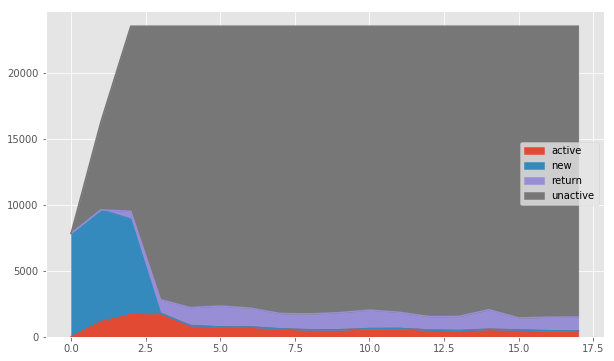

In [252]:
pylab.rcParams['figure.figsize'] = (10,6)
status_new.fillna(0).T.plot.area()

#### 新用户、活跃/不活跃用户、回流用户占比分布图
     从图中可以看出一开始新用户和活跃用户占比较高，三个月后活跃用户和新用户明显下降，回流用户趋于稳定

In [110]:
status_new.fillna(0).T.apply(lambda x :x/x.sum(),axis=1)

,active,new,return,unactive
0,0.000000,1.000000,0.000000,0.000000
1,0.070886,0.519299,0.000000,0.409815
2,0.071319,0.307510,0.025244,0.595927
3,0.075223,0.000000,0.044506,0.880272
4,0.036148,0.000000,0.057785,0.906067
5,0.031693,0.000000,0.067543,0.900764
6,0.031650,0.000000,0.060840,0.907510
7,0.025626,0.000000,0.049555,0.924820
8,0.022401,0.000000,0.051379,0.926220
9,0.022571,0.000000,0.055452,0.921977


#### 各月新用户、活跃/不活跃用户、回流用户占比

### 用户购买周期

In [114]:
order_diff = user_grouped.apply(lambda x:x.paidtime - x.paidtime.shift())

In [116]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: paidtime, dtype: object

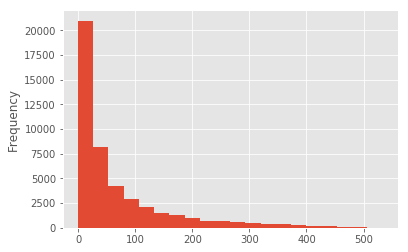

In [118]:
(order_diff/np.timedelta64(1,'D')).plot.hist(bins=20)

#### 用户购买周期频数分布图

#### 用户平均购买周期为68天，标准差为91天，中位数为31天，最大值为533天，说明用户购买周期波动较大
#### 且用户购买周期呈指数分布，大部分分布在0-100天内

### 用户生命周期

In [132]:
def user_life(x):
    return x.max()-x.min()
user_life = user_grouped.paidtime.apply(user_life)

In [133]:
user_life = user_life/np.timedelta64(1,'D')

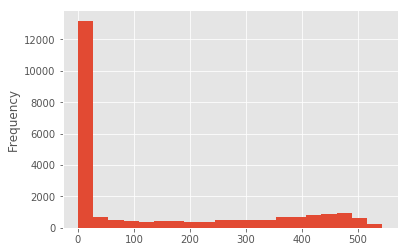

In [131]:
user_life.plot.hist(bins=20)

#### 大部分用户只消费一次，有一部分的用户生命周期聚集在400-500天之间

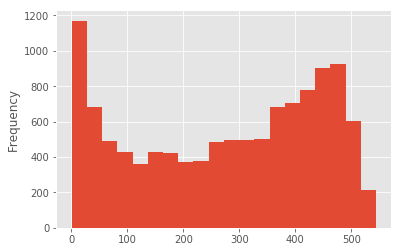

In [167]:
user_life[user_life>0].plot.hist(bins=20)

#### 过滤掉只购买一次的用户后，可以看到用户的购买周期呈双峰分布
#### 一部分的用户虽然消费了两次，但仍旧无法持续消费，因此在用户首次消费30天内应该尽量引导
#### 少部分用户生命周期集中在100-300天，属于普通型生命用户
#### 一部分忠诚用户的的生命周期在400天以上，需要重点维护

In [134]:
user_life.describe()

count    23570.000000
mean       134.871956
std        180.574109
min          0.000000
25%          0.000000
50%          0.000000
75%        294.000000
max        544.000000
Name: paidtime, dtype: float64

#### 用户的平均生命周期为134天，中位数为0天，说明大部分用户只购买了一次

### 复购率和回购率

#### 复购率：自然月内购买多次的用户占比

In [135]:
user_table = cd.pivot_table(index='user_id',columns='month',values='paidtime',aggfunc='count')

In [137]:
user_table = user_table.applymap(lambda x:1 if x>1 else 0 if x==1 else np.nan)

In [141]:
rebuy = user_table.sum()/user_table.count()

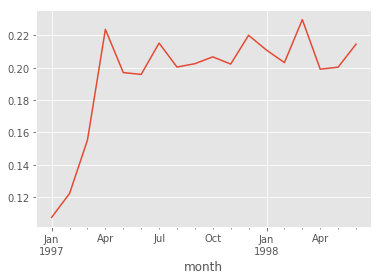

In [142]:
rebuy.plot()

#### 前三个月复购率较低，之后复购率提升至21%左右，且较为稳定

#### 回购率：曾经购买过的用户在某一时期内再次购买的比例

In [261]:
user_table2 = cd.pivot_table(index='user_id',columns='month',values='paidtime',aggfunc='count')

In [262]:
user_table2 = user_table2.applymap(lambda x :1 if x>=1 else 0)

In [263]:
def repurchase(x):
    lenth = len(x)
    status = []
    for i in range(lenth-1):
        if x[i] == 0:
            status.append(np.nan)
        else:
            if x[i+1] == 1:
                status.append(1)
            else:
                status.append(0)
    status.append(np.nan)
    return status

In [264]:
user_table2 = user_table2.apply(repurchase,axis=1,result_type='expand')

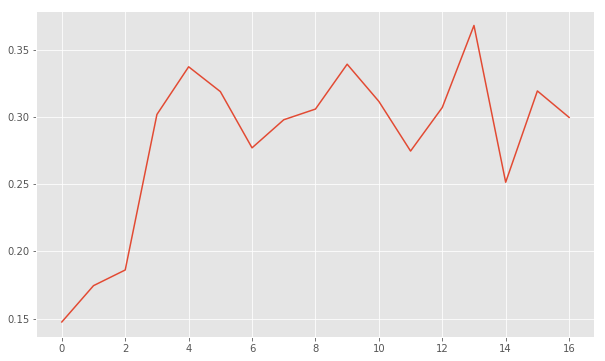

In [265]:
(user_table2 .sum()/user_table2 .count()).plot()

#### 由于大量新客户的涌入，且大部分人只消费了一次，导致前三个月的用户回购率较低，之后提升至30%左右，体现了用户忠诚度的上升